
Initial mean of 11952.4, initial deviation of 9534.62

Mean 11952.4, deviation 9534.62, removing 32033 pixels
Mean 11260.5, deviation 1236.36, removing 68458 pixels
Mean 11239.7, deviation 366.981, removing 111400 pixels
Mean 11206.0, deviation 216.898, removing 124089 pixels
Mean 11185.7, deviation 172.104, removing 92414 pixels
Mean 11174.7, deviation 153.399, removing 59882 pixels
Mean 11168.7, deviation 144.191, removing 38117 pixels
Mean 11165.2, deviation 139.09, removing 24743 pixels
Mean 11163.0, deviation 136.017, removing 16191 pixels
Mean 11161.6, deviation 134.091, removing 10784 pixels
Mean 11160.7, deviation 132.842, removing 7334 pixels
Mean 11160.1, deviation 132.007, removing 4999 pixels
Mean 11159.6, deviation 131.444, removing 3443 pixels
Mean 11159.4, deviation 131.059, removing 2349 pixels
Mean 11159.2, deviation 130.797, removing 1657 pixels
Mean 11159.0, deviation 130.614, removing 1114 pixels
Mean 11158.9, deviation 130.491, removing 735 pixels
Mean 11158.9, de

/home/cordell/anaconda3/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


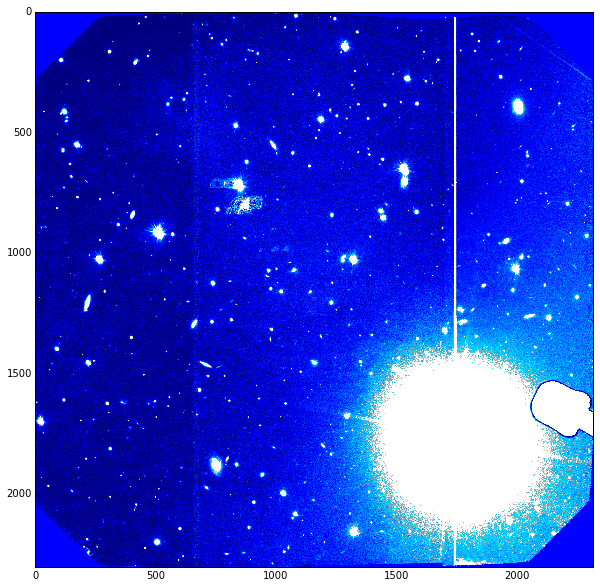

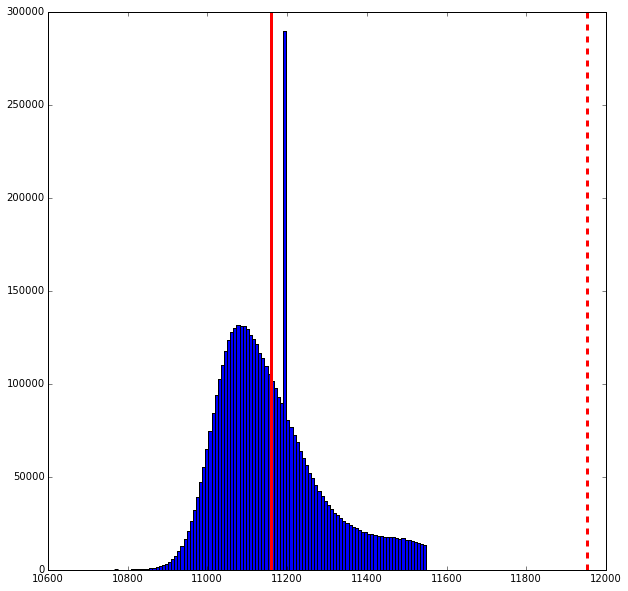

In [1]:
"""
Cordell Newmiller
Prof. Fassnacht
PHY 266
Homework 2
Problem 3

In the Resources → Homework → Data folder on the course smartsite is a file called 
0631_gmos_q2006_i.fits. In this problem you will implement a σ clipping algorithm and 
use it to choose nice limits to use when displaying the image.
"""

import numpy
from matplotlib import pyplot
from astropy.io import fits
get_ipython().magic('matplotlib inline')

# Assumes the file is in the working directory
gmosfits=fits.open('0631_gmos_q2006_i.fits')
gmos=gmosfits[0].data

"""
Part (a): Find the mean and standard deviation of the data in this image.
"""
initialmu=gmos.mean()
initialsigma=gmos.std()
print('\nInitial mean of ',initialmu,', initial deviation of ', initialsigma, '\n', sep='')

"""
Part (b): In python, write a function to perform a 3σ clip on the data. This function should 
(i) compute µ and σ of the input data set, 
(ii) reject all points for which the pixel value f is more than 3σ from the mean, 
        i.e., for which |f −µ| > 3σ, 
(iii) calculate a new µ and σ for the remaining pixels.
Repeat steps (ii) and (iii) until the size of the array of surviving pixels stops decreasing. Write
down the final clipped values, µclip and σclip, for the input data.
"""
pixelsremoved=1
while pixelsremoved != 0:
    mu=gmos[~numpy.isnan(gmos)].mean() # Suppress nan entries from invalidating the mean function
    sigma=gmos[~numpy.isnan(gmos)].std()
    badindices = numpy.abs(gmos-mu)>3*sigma  # True/false array marking indices of data to be clipped
    pixelsremoved = badindices.sum()
    print('Mean ',mu,', deviation ', sigma,', removing ', pixelsremoved, ' pixels', sep='')
    gmos[badindices]=numpy.nan           
    # Use 'nan' to fill unwanted pixels instead of removing them entirely, to preserve shape of array

print('\nFinal clipped mean of ',mu,', final clipped deviation of ', sigma, sep='')

"""
Part (c): Display the image with imshow, but set the vmin and vmax parameters to be µclip − σclip
and µclip + 10σclip, respectively. Save the plot as a png file and submit it.
"""
figure1 = pyplot.figure(figsize=(10,10))
pyplot.imshow(gmos, vmin=mu-sigma, vmax=mu+10*sigma);

# Saves file to the working directory
pyplot.savefig('CJNhw02p3partC.png')

"""
Part (d): Plot a histogram showing the distribution of data values in the image. Draw two vertical
lines: a dashed line showing the mean of the data from part (a) and a solid line showing µclip.
Note: for those of you who are new to python, matplotlib has a hist command that will make
this pretty straightforward.
"""
figure2 = pyplot.figure(figsize=(10,10))
pyplot.hist(gmos[~numpy.isnan(gmos)].flatten(),bins=100);
pyplot.axvline(initialmu,linestyle='--',color='r',linewidth=3)
pyplot.axvline(mu,color='r',linewidth=3)

# End of problem 3
